<a href="https://colab.research.google.com/github/fabulouskorex/Apple-Stock-Price-LSTM-Model/blob/main/Apple_Stock_Price_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [60]:
import yfinance as yf

start_date = '1997-01-01'
end_date = '2022-02-23'

# Use the yfinance library to get data from Yahoo Finance
apple_data = yf.download('AAPL', start=start_date, end=end_date)

apple_data = apple_data.reset_index()

# Print the first few rows of the dataframe
print(apple_data.head())

[*********************100%***********************]  1 of 1 completed
        Date      Open      High       Low     Close  Adj Close      Volume
0 1997-01-02  0.188616  0.189732  0.185268  0.187500   0.159585   143113600
1 1997-01-03  0.188616  0.198661  0.187500  0.194196   0.165284   119716800
2 1997-01-06  0.157366  0.163783  0.154018  0.159598   0.135837  1882832000
3 1997-01-07  0.161830  0.162946  0.156250  0.156250   0.132987   976931200
4 1997-01-08  0.162946  0.164063  0.155134  0.157366   0.133937  1100131200


In [61]:
apple_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6323,2022-02-15,170.970001,172.949997,170.250000,172.789993,171.749573,62527400
6324,2022-02-16,171.850006,173.339996,170.050003,172.550003,171.511032,61177400
6325,2022-02-17,171.029999,171.910004,168.470001,168.880005,167.863144,69589300
6326,2022-02-18,169.820007,170.539993,166.190002,167.300003,166.292648,82772700
6327,2022-02-22,164.979996,166.690002,162.149994,164.320007,163.330597,91162800


In [62]:
apple_data.shape

(6328, 7)

In [63]:
apple_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [64]:
apple_data.duplicated().sum()

0

In [65]:
# check for the existence of null values
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6328 non-null   datetime64[ns]
 1   Open       6328 non-null   float64       
 2   High       6328 non-null   float64       
 3   Low        6328 non-null   float64       
 4   Close      6328 non-null   float64       
 5   Adj Close  6328 non-null   float64       
 6   Volume     6328 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 346.2 KB


In [66]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6328.000000,6328.000000,6328.000000,6328.000000,6328.000000,6.328000e+03
mean,22.226383,22.463959,21.988737,22.235069,21.126115,4.272071e+08
std,35.110688,35.504599,34.723643,35.129106,34.736692,3.897021e+08
min,0.114955,0.118304,0.113839,0.115513,0.098315,3.934000e+07
25%,0.520045,0.532645,0.513119,0.524219,0.446172,1.617611e+08
50%,6.627142,6.684464,6.518215,6.616786,5.631667,3.154592e+08
75%,27.906250,28.125000,27.556250,27.943124,25.566388,5.613468e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [67]:
apple_data.nunique()

Date         6328
Open         5457
High         5352
Low          5351
Close        5476
Adj Close    5554
Volume       6281
dtype: int64

In [68]:
apple_data = apple_data.drop(columns=['Adj Close'])

In [69]:
apple_data.head()

,Date,Open,High,Low,Close,Volume
0,1997-01-02,0.188616,0.189732,0.185268,0.187500,143113600
1,1997-01-03,0.188616,0.198661,0.187500,0.194196,119716800
2,1997-01-06,0.157366,0.163783,0.154018,0.159598,1882832000
3,1997-01-07,0.161830,0.162946,0.156250,0.156250,976931200
4,1997-01-08,0.162946,0.164063,0.155134,0.157366,1100131200


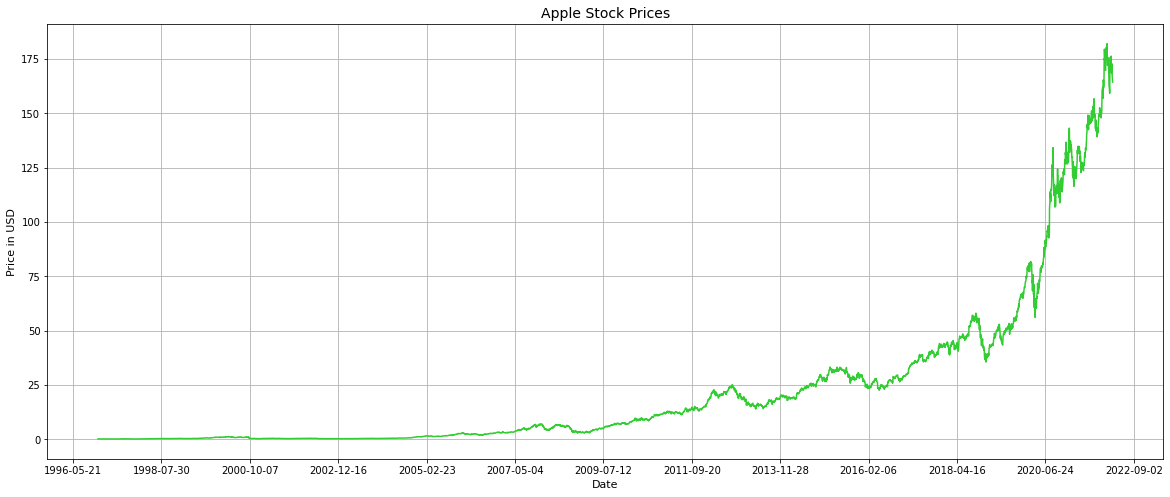

In [70]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(apple_data['Date'], apple_data['Close'], color='limegreen')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Price in USD', fontsize=11)
ax.set_title('Apple Stock Prices', fontsize=14)
ax.grid()
plt.show()

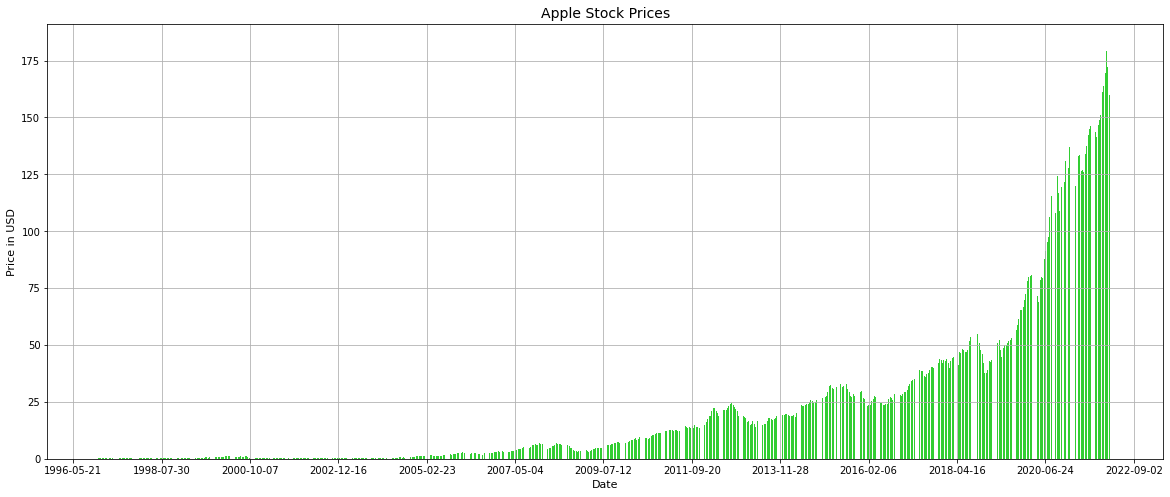

In [71]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(apple_data['Date'], apple_data['Close'], color='limegreen')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Price in USD', fontsize=11)
ax.set_title('Apple Stock Prices', fontsize=14)
ax.grid()
plt.show()

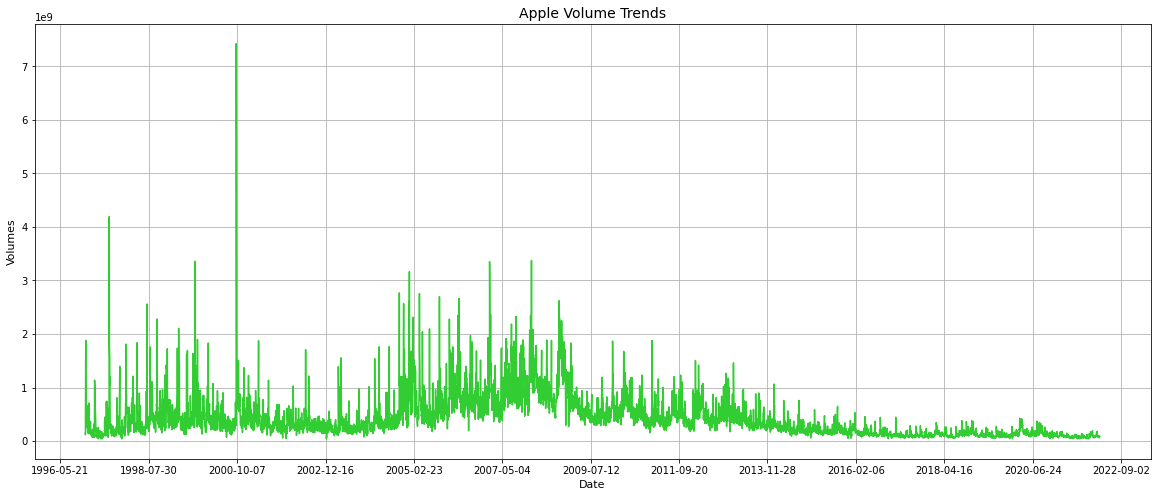

In [72]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(apple_data['Date'], apple_data['Volume'], color='limegreen')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Volumes', fontsize=11)
ax.set_title('Apple Volume Trends', fontsize=14)
ax.grid()
plt.show()

In [73]:
apple_data['Market Cap'] = apple_data['Open']*apple_data['Volume']

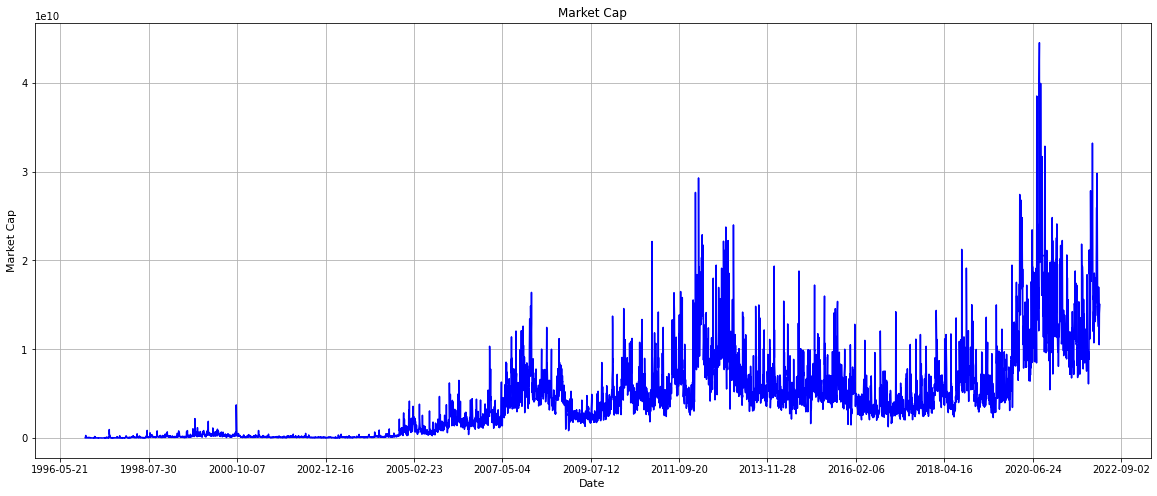

In [74]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(apple_data['Date'], apple_data['Market Cap'], color='blue') 
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

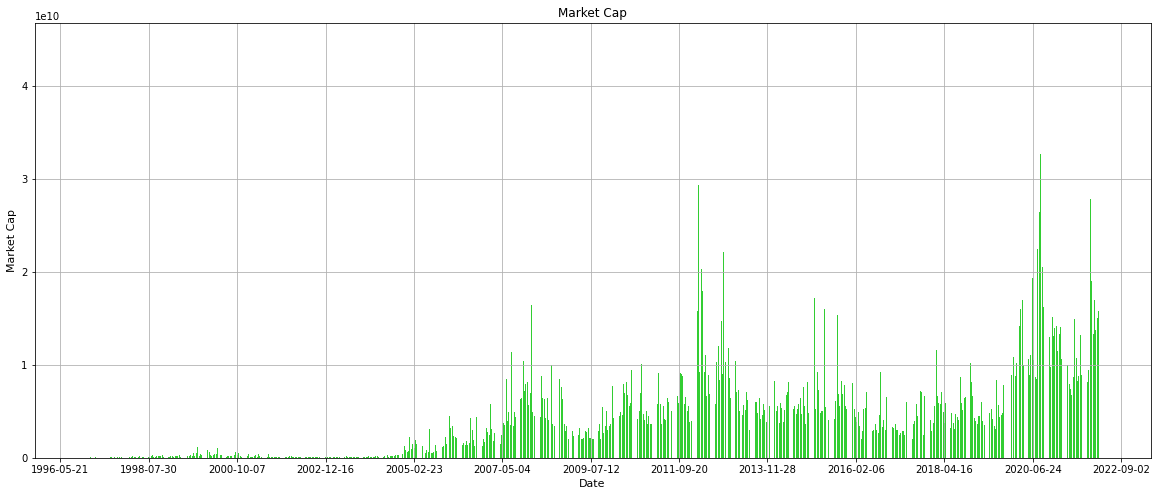

In [75]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(apple_data['Date'], apple_data['Market Cap'], color='limegreen') 
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [76]:
apple_data.iloc[apple_data['Market Cap'].argmax()]

Date          2020-08-24 00:00:00
Open                   128.697495
High                   128.785004
Low                      123.9375
Close                  125.857498
Volume                  345937600
Market Cap     44521302375.708008
Name: 5950, dtype: object

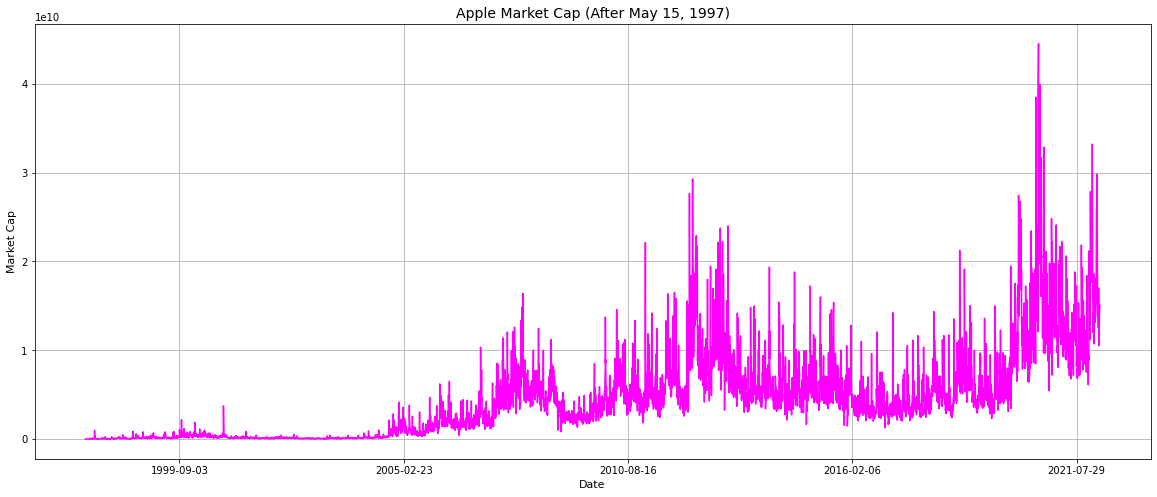

In [77]:
# Filter apple_data to include data after May 15, 1997
ohlc = apple_data[apple_data['Date'] > '1997-05-15']
# Keep only the columns of interest
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
# Convert date strings to datetime objects
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
# Plot the market cap data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='magenta')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Market Cap', fontsize=11)
ax.set_title('Apple Market Cap (After May 15, 1997)', fontsize=14)
ax.grid()
plt.show()


In [78]:
apple_data['vol'] = (apple_data['Close']/apple_data['Close'].shift(1)) - 1

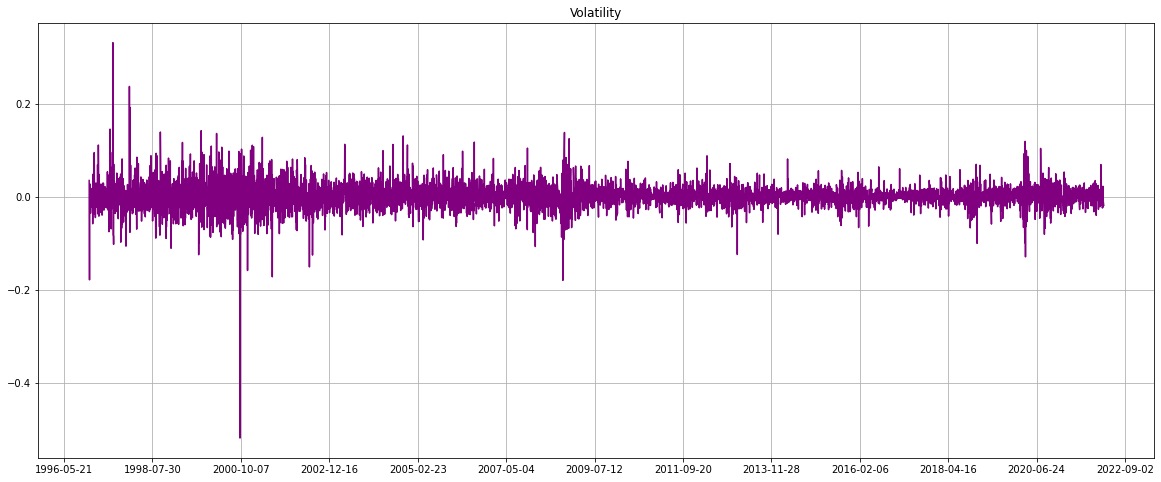

In [79]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(apple_data['Date'], apple_data['vol'], color='purple') 
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.title('Volatility')
plt.grid()
plt.show()

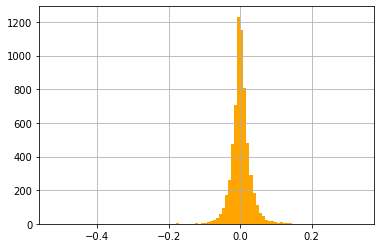

In [80]:
apple_data['vol'].hist(bins=100, color='orange');

In [81]:
apple_data['Cumulative Return'] = (1 + apple_data['vol']).cumprod()

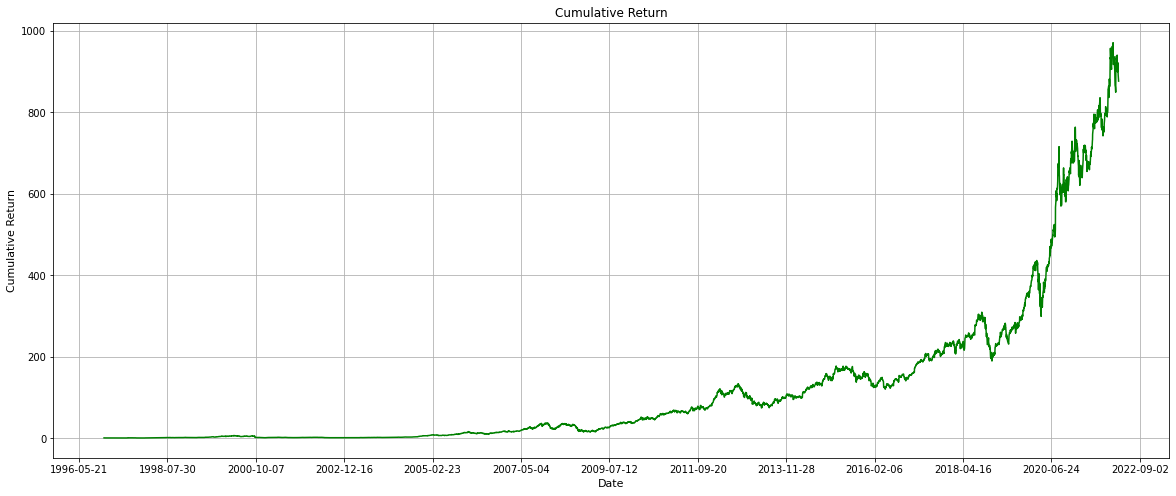

In [82]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(apple_data['Date'], apple_data['Cumulative Return'], color='green') 
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

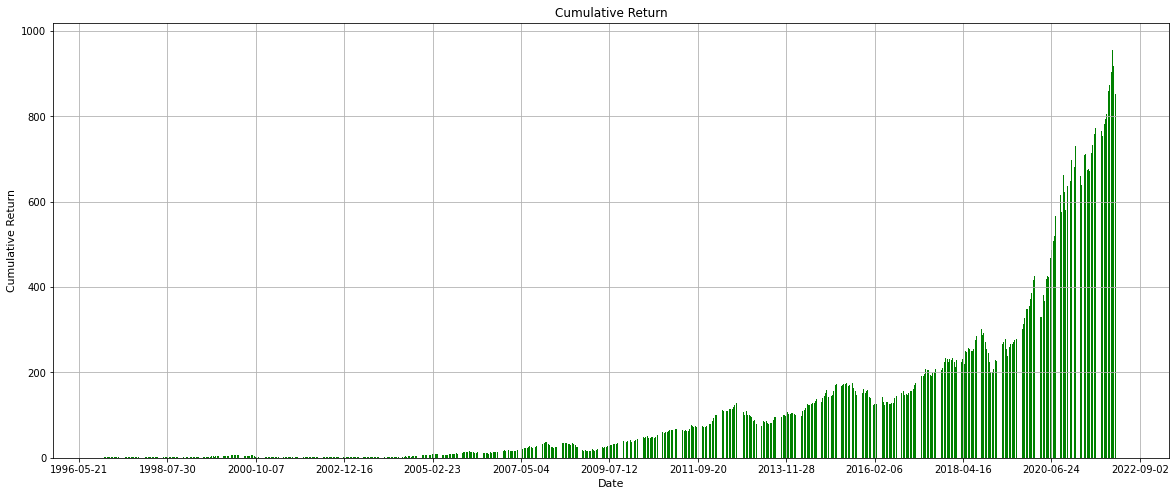

In [83]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(apple_data['Date'], apple_data['Cumulative Return'], color='green') 
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

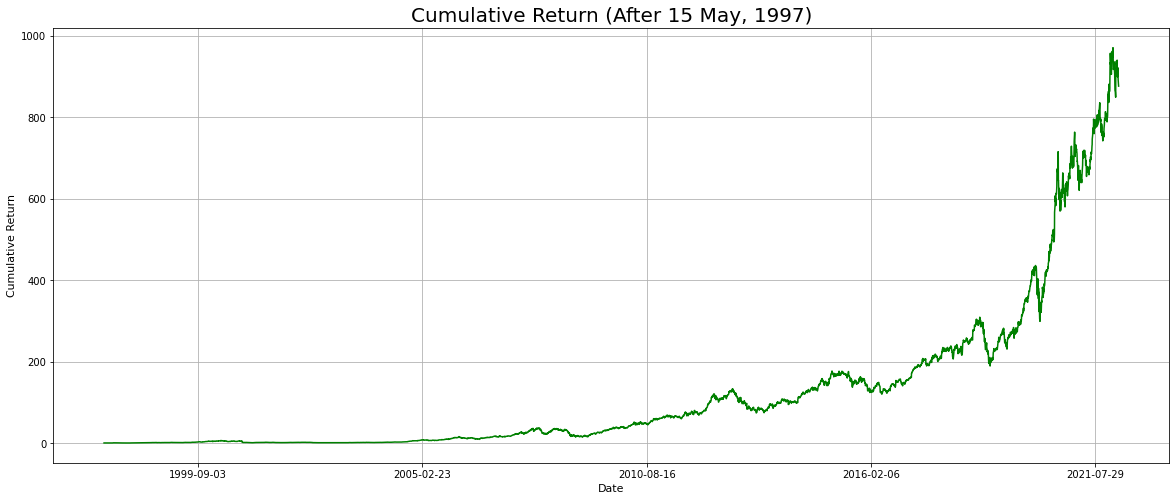

In [84]:
ohlc = apple_data.loc[apple_data['Date'] > '1997-05-15', ['Date', 'Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Cumulative Return', fontsize=11)
ax.grid(True)
plt.title('Cumulative Return (After 15 May, 1997)', fontsize=20)
plt.show()


In [85]:
apple_data.iloc[apple_data['Cumulative Return'].argmax()]

Date                 2022-01-03 00:00:00
Open                          177.830002
High                          182.880005
Low                           177.710007
Close                         182.009995
Volume                         104487900
Market Cap            18581083448.323059
vol                             0.025004
Cumulative Return             970.719971
Name: 6293, dtype: object

## Model Building

#### LSTM Model

In [87]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.set_index('Date',inplace=True)

In [88]:
data = apple_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8) 
training_data_len

5063

In [89]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(dataset) 
scaled_data

array([[3.95762436e-04],
       [4.32574991e-04],
       [2.42365770e-04],
       ...,
       [9.27815349e-01],
       [9.19128984e-01],
       [9.02745883e-01]])

In [91]:
train_data = scaled_data[0:training_data_len, :] 
x_train = []
y_train = []
for i in range(80,len(train_data)):
  x_train.append(train_data[i-60:i, 0]) 
  y_train.append(train_data[i,0])
if i<=60:
  print(x_train) 
  print(y_train) 
  print()

In [92]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [93]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
x_train.shape

(4983, 60, 1)

In [94]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1))) 
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [95]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [96]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
4983/4983 [==============================] - 193s 38ms/step - loss: 5.3925e-05
Epoch 2/10
4983/4983 [==============================] - 170s 34ms/step - loss: 2.1795e-05
Epoch 3/10
4983/4983 [==============================] - 170s 34ms/step - loss: 1.2673e-05
Epoch 4/10
4983/4983 [==============================] - 169s 34ms/step - loss: 1.0972e-05
Epoch 5/10
4983/4983 [==============================] - 169s 34ms/step - loss: 1.0274e-05
Epoch 6/10
4983/4983 [==============================] - 168s 34ms/step - loss: 9.2077e-06
Epoch 7/10
4983/4983 [==============================] - 167s 33ms/step - loss: 7.4855e-06
Epoch 8/10
4983/4983 [==============================] - 179s 36ms/step - loss: 7.1153e-06
Epoch 9/10
4983/4983 [==============================] - 171s 34ms/step - loss: 7.2983e-06
Epoch 10/10
4983/4983 [==============================] - 168s 34ms/step - loss: 6.2276e-06


In [97]:
test_data= scaled_data[training_data_len-60:, :] 
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [98]:
x_test = np.array(x_test)

In [99]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1)) 
x_test.shape

(1265, 60, 1)

In [100]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

40/40 [==============================] - 6s 31ms/step


In [101]:
rmse = np.sqrt(np.mean(predictions - y_test)**2) 
rmse

7.320205383903896

<ipython-input-103-651e7733f686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


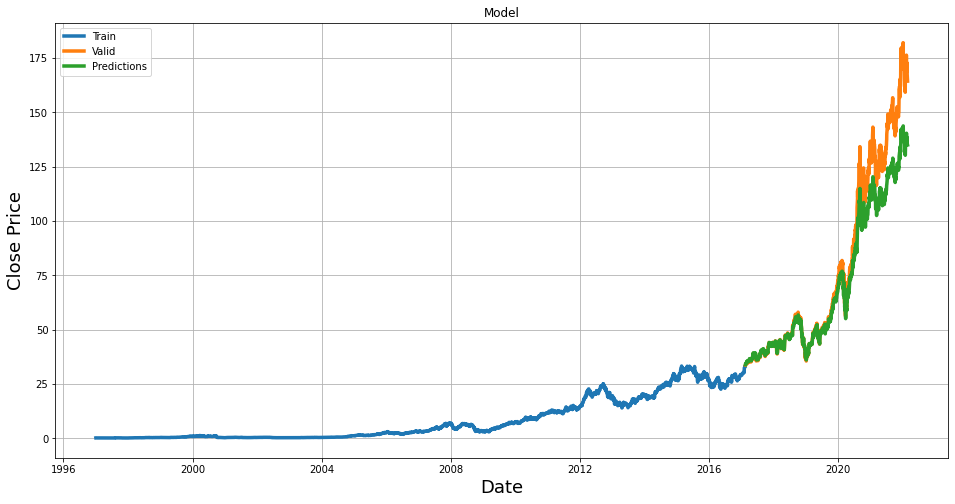

In [103]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18) 
plt.plot(train['Close'],linewidth=3.5) 
plt.plot(valid[['Close','Predictions']],linewidth=3.5) 
plt.legend(['Train','Valid','Predictions'], loc='upper left') 
plt.grid()
plt.show()

In [105]:
valid.tail(10)

,Close,Predictions
Date,,
2022-02-08,174.830002,137.607880
2022-02-09,176.279999,139.630630
2022-02-10,172.119995,140.346100
2022-02-11,168.639999,137.597687
2022-02-14,168.880005,135.643143
2022-02-15,172.789993,136.065018
2022-02-16,172.550003,138.525070
2022-02-17,168.880005,138.101669
2022-02-18,167.300003,135.724609


In [106]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = apple_data.filter(['Close']).values
scaled_prices = scaler.fit_transform(close_prices)
window_size = 60

# Prepare test data
last_60_days = scaled_prices[-window_size:]
X_test = np.array([last_60_days])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

# Print predicted price
print('Predicted price:', pred_price)

1/1 [==============================] - 0s 59ms/step
Predicted price: [[133.20259]]
